<a href="https://colab.research.google.com/github/ngamije30/MySuperRepo/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative 3 - Probability Distributions, Bayesian Probability, and Gradient Descent Implementation

#Group 10 Project Submission
Binomial distribution is a discrete probability distribution that models the probability of obtaining a specific number of successes in a fixed number of indepented trials, where each trial has only two possible outcomes, success of failure.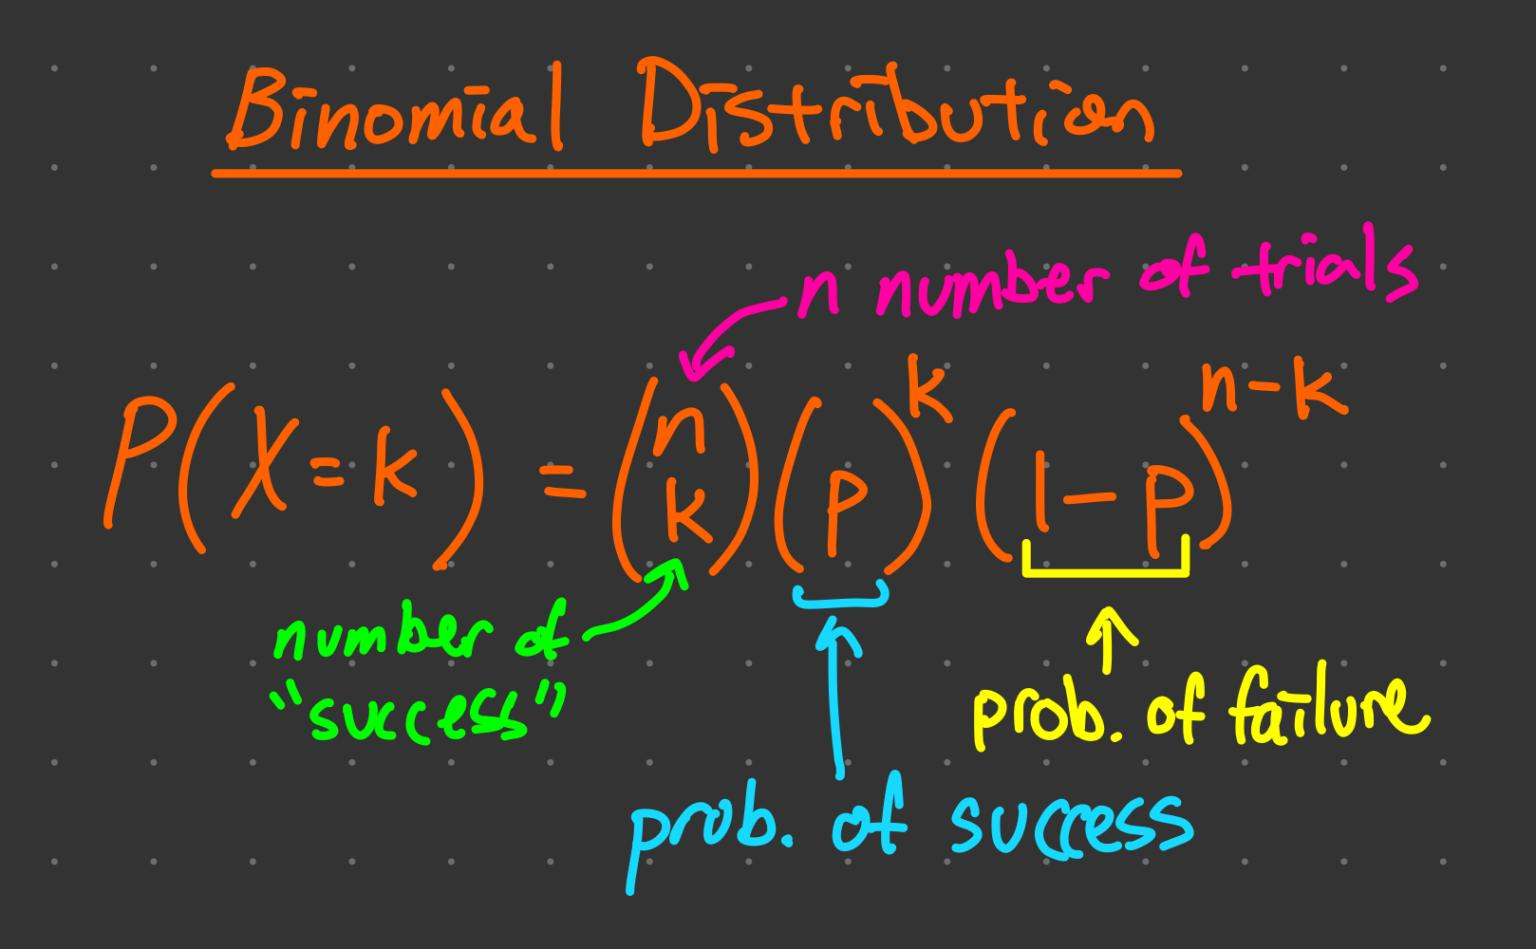

We as group 10 will be working on a comprehensive assignment designed to deepen our understanding in probability and machine learning.

This notebook presents our implementations and analysis for the following three components:

Part 1: Binomial Distribution.

Part 2: Bayesian Probability Application.

Part 3: Gradien Descent for Linear Regression.

In [ ]:
print("Starting Gradient Descent (4 iterations)...\n")

for i in range(iterations):
    # Compute current predictions and error
    y_pred = m * x + b
    error = compute_error(y, y_pred)
    error_history.append(error)

    # Print current status
    print(f"Iteration {i+1}:")
    print("-" * 30)
    print(f"Current parameters: m = {m:.4f}, b = {b:.4f}")
    print(f"Predictions: {y_pred}")
    print(f"Mean Squared Error: {error:.4f}\n")

    # Perform one gradient descent step
    m, b, dJ_dm, dJ_db = gradient_descent_step(x, y, m, b, alpha)

    # Store new values
    m_history.append(m)
    b_history.append(b)

    # Print update details
    print("Gradient Calculations:")
    print(f"∂J/∂m = {dJ_dm:.4f}")
    print(f"∂J/∂b = {dJ_db:.4f}")
    print("\nParameter Updates:")
    print(f"New m = {m:.4f} (Previous m - {alpha} * {dJ_dm:.4f})")
    print(f"New b = {b:.4f} (Previous b - {alpha} * {dJ_db:.4f})")
    print("\n" + "="*50 + "\n")

# Final predictions with optimized parameters
final_predictions = m * x + b
final_error = compute_error(y, final_predictions)

4. Run Gradient Descent for 4 Iterations

**Part 1: Binomial Distribution – Pancreatic Cancer Risk Analysis**

Problem Statement
The lifetime risk of developing pancreatic cancer is about 1 in 78 (approximately 1.28%). Suppose we randomly sample 200 people. Let X be the number of people in this sample who will develop pancreatic cancer.

1. Binomial Distribution for X
Since each person either develops pancreatic cancer or does not, independently, and the probability of developing it is constant, the random variable X follows a Binomial distribution with

with parameters:

Number of trials:
𝑛
=
200

Probability of success (developing cancer):
𝑝
=
1/78
≈
0.0128

Using the formulas, calculate the (i) mean and (ii) standard deviation of X.

 find the probability that at most eight people develop pancreatic s

 is it more likely that five or six people will develop pancreatic cancer? Justify your answer numerically.


# Step 1: Define factorial and combination functions

In [ ]:
def factorial(n):
    result = 1
    for i in range(2, n+1):
        result *= i
    return result

def combination(n, k):
    return factorial(n) // (factorial(k) * factorial(n - k))

#Step 2: Define binomial PMF function


In [ ]:
def binomial_pmf(n, k, p):
    return combination(n, k) * (p ** k) * ((1 - p) ** (n - k))


#Step 3: Calculate mean and standard deviation

In [ ]:
n = 200
p = 1 / 78  # approximately 0.0128

mean = n * p
std_dev = (n * p * (1 - p)) ** 0.5

print(f"Mean (expected number): {mean:.4f}")
print(f"Standard deviation: {std_dev:.4f}")


Mean (expected number): 2.5641
Standard deviation: 1.5910


# Step 4: Calculate probability that at most 8 people develop pancreatic cancer

In [ ]:
prob_at_most_8 = 0
for k in range(0, 9):
    prob_at_most_8 += binomial_pmf(n, k, p)

print(f"Probability that at most 8 people develop pancreatic cancer: {prob_at_most_8:.5f}")

Probability that at most 8 people develop pancreatic cancer: 0.99877


#Step 5: Compare probability of exactly 5 vs. 6 people developing pancreatic cancer



In [ ]:
prob_5 = binomial_pmf(n, 5, p)
prob_6 = binomial_pmf(n, 6, p)

print(f"P(X = 5): {prob_5:.5f}")
print(f"P(X = 6): {prob_6:.5f}")

if prob_5 > prob_6:
    print("It is more likely that 5 people will develop pancreatic cancer.")
else:
    print("It is more likely that 6 people will develop pancreatic cancer.")

P(X = 5): 0.07093
P(X = 6): 0.02994
It is more likely that 5 people will develop pancreatic cancer.


#Step 6: Visualize the distribution using Matplotlib

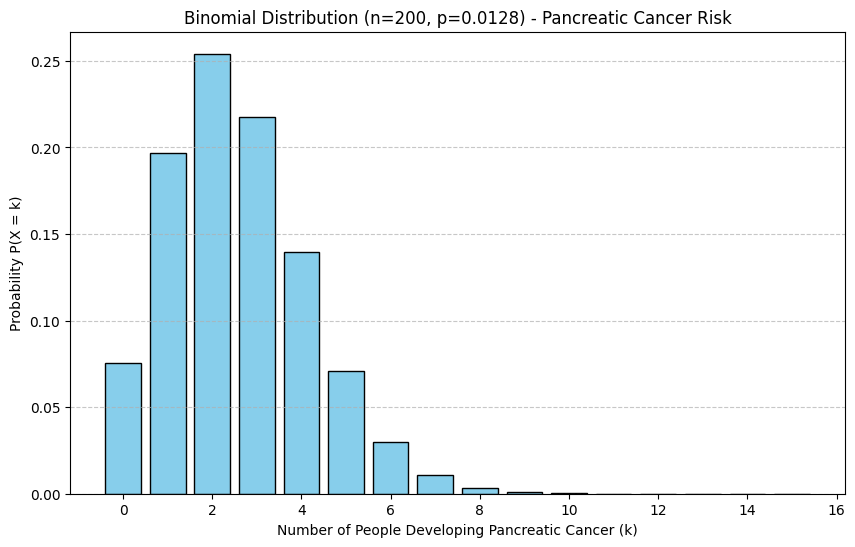

In [ ]:
import matplotlib.pyplot as plt

# Choose k values around the mean for better visualization
k_values = list(range(0, 16))
probabilities = [binomial_pmf(n, k, p) for k in k_values]

plt.figure(figsize=(10, 6))
plt.bar(k_values, probabilities, color='skyblue', edgecolor='black')
plt.xlabel('Number of People Developing Pancreatic Cancer (k)')
plt.ylabel('Probability P(X = k)')
plt.title(f'Binomial Distribution (n={n}, p={p:.4f}) - Pancreatic Cancer Risk')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Part 2: Bayesian Probability**
1. Real-World Problem
Scenario:
An insurance company has insured 4,000 doctors, 8,000 teachers, and 12,000 businessmen. The probability that a doctor, teacher, or businessman dies before the age of 58 is 0.01, 0.03, and 0.05, respectively.

Question:

If one of the insured individuals dies before 58, what is the probability that he is a doctor?

# Step 1: Priors

In [ ]:
total = 4000 + 8000 + 12000
P_D = 4000 / total
P_T = 8000 / total
P_B = 12000 / total

#Step 2: Likelihoods

In [ ]:
P_Death_given_D = 0.01
P_Death_given_T = 0.03
P_Death_given_B = 0.05

#Step 3: Total Probability of Death

In [ ]:
P_Death = (P_D * P_Death_given_D) + (P_T * P_Death_given_T) + (P_B * P_Death_given_B)

# Step 4: Posterior Probability (Bayes' Theorem)



In [ ]:
P_D_given_Death = (P_D * P_Death_given_D) / P_Death

# Step 5 Display step-by-step values

In [ ]:
print(f"P(D) = {P_D:.4f}")
print(f"P(T) = {P_T:.4f}")
print(f"P(B) = {P_B:.4f}")
print(f"P(Death | D) = {P_Death_given_D:.2f}")
print(f"P(Death | T) = {P_Death_given_T:.2f}")
print(f"P(Death | B) = {P_Death_given_B:.2f}")
print(f"P(Death) = {P_Death:.4f}")
print(f"P(D | Death) = {P_D_given_Death:.4f}")

P(D) = 0.1667
P(T) = 0.3333
P(B) = 0.5000
P(Death | D) = 0.01
P(Death | T) = 0.03
P(Death | B) = 0.05
P(Death) = 0.0367
P(D | Death) = 0.0455


**Practical Significance of Bayesian Inference**

Bayesian inference allows the insurance company to update the probability that a deceased insured individual was a doctor, given the event (death before age 58).

Practical use: This helps insurers assess risk, set premiums, and understand which groups are more or less likely to claim early death benefits.

General significance: Bayesian methods are powerful for updating beliefs and making informed decisions as new evidence becomes available.

#Part 4: Gradient Descent in Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#1. Initialize Data and Parameters

In [ ]:
# Given data points (x, y)
x = np.array([1, 3])
y = np.array([3, 6])

# Initial parameters
m = -1
b = 1

alpha = 0.1

iterations = 4

#2. Define Helper Functions

In [ ]:
def compute_error(y, y_pred):
    """Compute mean squared error between actual and predicted values"""
    return np.mean((y - y_pred)**2)

def gradient_descent_step(x, y, m, b, alpha):
    """
    Perform one iteration of gradient descent
    Returns updated parameters and gradients
    """
    n = len(x)

    # Compute predictions with current parameters
    y_pred = m * x + b

    # Compute gradients
    dJ_dm = (-2/n) * np.sum((y - y_pred) * x)
    dJ_db = (-2/n) * np.sum(y - y_pred)

    # Update parameters using gradient descent
    m_new = m - alpha * dJ_dm
    b_new = b - alpha * dJ_db

    return m_new, b_new, dJ_dm, dJ_db

#3. Prepare for Tracking Progress

In [ ]:
# Lists to store values for visualization
m_history = [m]
b_history = [b]
error_history = []